# Process
In this notebook, I will analyze the dataset it and prepare it for training of Recommender systems.

## A. Import Libraries

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import numpy as np
from analyze_data import read_popularity, users_and_items, user_distribution,item_distribution, calculate_popularity, calculate_group_characteristics, calculate_gini_coefficient
from plots import plot_data_distribution, plot_popularity_distribution, plot_profile_size_vs_popularity, plot_group_characteristics, plot_Lorenz
import tqdm 
from split_users import sort_user_dist, split, split_differently
import time
import pickle as pkl
from sklearn.model_selection import train_test_split
pd.set_option("display.precision", 5)
from collections import Counter
import string


## B. Set hyperparameters
There are certain hyperparameters that need to be tuned before the run. 

In [44]:
item_threshold = 5 # remove users with less than item_threshold items
user_threshold = 5 # remove items with less than user_threshold users
top_threshold = 200 # remove users who have rated more than top_threshold items
recommendation_type = "books" # books, music or movies
item_col = "book" # the item column
my_seed = 0 # random_seed
top_fraction_items = 0.2 # the limit for an item to be considered popular
top_fraction_users = 0.2# the limit for a user to be considered High Mainstriminess
split_by = "pop_fraq" # sort users by fraction of popular items (pop_fraq) or by average popularity in profile (pop_item_fraq)

These additions will be useful so we can save the different files (plots and processed data) with clarity on the hyperparameters.

In [45]:
addition_1 = "_u"+str(item_threshold)+"_i"+str(user_threshold)+"_t"+str(top_threshold)
addition_2 = addition_1 + "_tfi"+str(int(100*top_fraction_items))
addition_3 = addition_2 + "_tfu"+str(int(100*top_fraction_users))
addition_4 = addition_3 + ("_sbpf" if (split_by=="pop_fraq") else "_sbpif")

In [46]:
print(addition_4)

_u5_i5_t200_tfi20_tfu20_sbpf


In [47]:
rd.seed(my_seed) #seed for random functions
np.random.seed(my_seed) #seed for all numpy fuctions

## C. Read files

In [48]:
raw_file_location = "data/raw/" # here are stored the raw data files
processed_file_location = "data/processed/" # here we store the processed data files

In [49]:
user_file = raw_file_location + "users_books.csv" # the users file

In [50]:
users = pd.read_csv(user_file)

In [51]:
users.Location = users.Location.apply(lambda x: x.split(", ")[-1])

In [52]:
users.Location = users.Location.apply(lambda x: simplify(x))

In [53]:
def simplify(name):
    name = name.replace(" ","").translate(str.maketrans('', '', string.punctuation)).lower()
    return name

In [54]:
len(users.Location.unique())

962

In [55]:
most_common_5 = [x[0] for x in Counter(users.Location).most_common()[:5]]
print(most_common_5)

['usa', 'canada', 'unitedkingdom', 'germany', 'spain']


In [56]:
users["location"] = users["Location"].apply(lambda x: "other" if (x in most_common_5) == False else x)

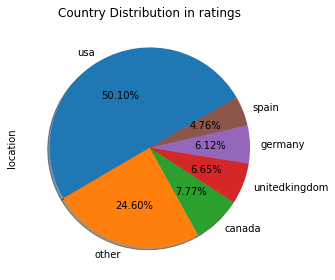

In [57]:
fig, ax = plt.subplots()
# df.country = df.country.replace("United States of America", "USA")
# df.country = df.country.replace("United Kingdom", "UK")
# df.country = df.country.replace("Republic of Ireland", "Ireland")
users.location.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30)
ax.title.set_text("Country Distribution in ratings")    
fig.tight_layout()

# Fairbook

In [58]:
fairbook_ratings = pd.read_csv(processed_file_location +recommendation_type + "/mapped_ratings_with_properties.csv", index_col = 0)

In [59]:
users_country = users[["User-ID", "location"]]

In [61]:
mapped_ratings = pd.merge(fairbook_ratings,users_country,on="User-ID")

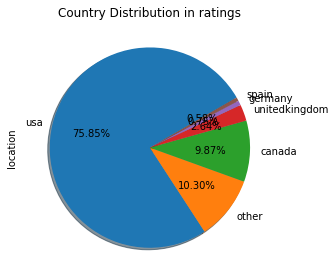

In [62]:
fig, ax = plt.subplots()
# df.country = df.country.replace("United States of America", "USA")
# df.country = df.country.replace("United Kingdom", "UK")
# df.country = df.country.replace("Republic of Ireland", "Ireland")
mapped_ratings.location.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30)
ax.title.set_text("Country Distribution in ratings")    
fig.tight_layout()

In [63]:
unique_users = mapped_ratings.drop_duplicates("User-ID")

In [64]:
len(unique_users)

6358

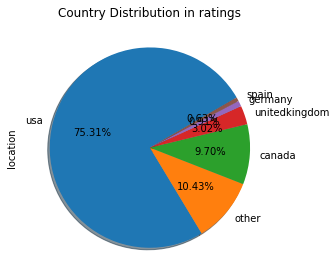

In [65]:
fig, ax = plt.subplots()
# df.country = df.country.replace("United States of America", "USA")
# df.country = df.country.replace("United Kingdom", "UK")
# df.country = df.country.replace("Republic of Ireland", "Ireland")
unique_users.location.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30)
ax.title.set_text("Country Distribution in ratings")    
fig.tight_layout()